In [86]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [87]:
df=pd.read_csv("Plane Crashes.csv")
df.head(10)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,NaN,NaN,NaN,Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,NaN,NaN,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,NaN,NaN,NaN,Maxstoke Warwickshire,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,NaN,NaN,NaN,Cascais Estremadura - Lisbon District,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,B9976,1918.0,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown


In [88]:
#Affichage de la totalité des colonnes
pd.set_option('display.max_columns',None)
df.head(10)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,NaN,NaN,NaN,Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,NaN,NaN,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,NaN,NaN,NaN,Maxstoke Warwickshire,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,NaN,NaN,NaN,Cascais Estremadura - Lisbon District,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,B9976,1918.0,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on board     28512 non-null  float6

In [90]:
#Affichage des valeurs uniques du dataset pour chaque colonnes
for colonne in df.columns:
    valeurs_uniques=df[colonne].unique()
    print(f"Les valeurs uniques de {colonne}:\n{valeurs_uniques}\n")

Les valeurs uniques de Date:
['1918-05-02' '1918-06-08' '1918-06-11' ... '2022-05-24' '2022-05-29'
 '2022-06-03']

Les valeurs uniques de Time:
[nan '15H 15M 0S' '12H 0M 0S' ... '3H 21M 0S' '2H 53M 0S' '13H 33M 0S']

Les valeurs uniques de Aircraft:
['De Havilland DH.4' 'Handley Page V/1500' 'Avro 504' ...
 'Cirrus Vision SF50' 'Socata TBM-910' 'Learjet 75']

Les valeurs uniques de Operator:
['United States Signal Corps - USSC' 'Handley Page Aircraft Company Ltd'
 'Royal Air Force - RAF' ... 'Raul Ignacion Posada'
 'Yakutat Coastal Airlines' 'GoJump Oceanside']

Les valeurs uniques de Registration:
['AS-32084' 'E4104' 'A8544' ... 'N703TH' '9N-AET' 'N7581F']

Les valeurs uniques de Flight phase:
['Takeoff (climb)' 'Flight' 'Landing (descent or approach)' nan 'Taxiing'
 'Parking']

Les valeurs uniques de Flight type:
['Test' 'Training' 'Military' 'Delivery'
 'Survey / Patrol / Reconnaissance' 'Postal (mail)' 'Ferry'
 'Aerial photography' 'Scheduled Revenue Flight' 'Government' 'Private'


In [91]:
#Vérification du nombre de valeurs manquantes pour chaque colonnes
df.isna().sum()

Date                    0
Time                14587
Aircraft                1
Operator                0
Registration          815
Flight phase          638
Flight type            57
Survivors            1297
Crash site            383
Schedule             8946
MSN                  4182
YOM                  5311
Flight no.          28536
Crash location         12
Country                 1
Region                  1
Crew on board          24
Crew fatalities         1
Pax on board           54
PAX fatalities          1
Other fatalities       10
Total fatalities        0
Circumstances          25
Crash cause             0
dtype: int64

In [92]:
#Retrait des colonnes inutiles
df=df.drop(['Time','Aircraft','Operator','Registration','MSN','Flight no.','YOM','Circumstances','Schedule'],axis=1)

In [93]:
#Retrait des colonnes avec des valeurs manquantes
df.dropna(inplace=True)

In [94]:
#Vérification
df.isna().sum()

Date                0
Flight phase        0
Flight type         0
Survivors           0
Crash site          0
Crash location      0
Country             0
Region              0
Crew on board       0
Crew fatalities     0
Pax on board        0
PAX fatalities      0
Other fatalities    0
Total fatalities    0
Crash cause         0
dtype: int64

In [95]:
#Mise en forme de la date
df['Date']=pd.to_datetime(df['Date'])
#Extraction de l'annee de la colonne 'Date'
df['Year']=df['Date'].dt.year

### Courbes d'analyse rapide

Year
1918     17
1919     46
1920     89
1921     78
1922     71
       ... 
2018    131
2019    144
2020    113
2021    113
2022     39
Length: 105, dtype: int64


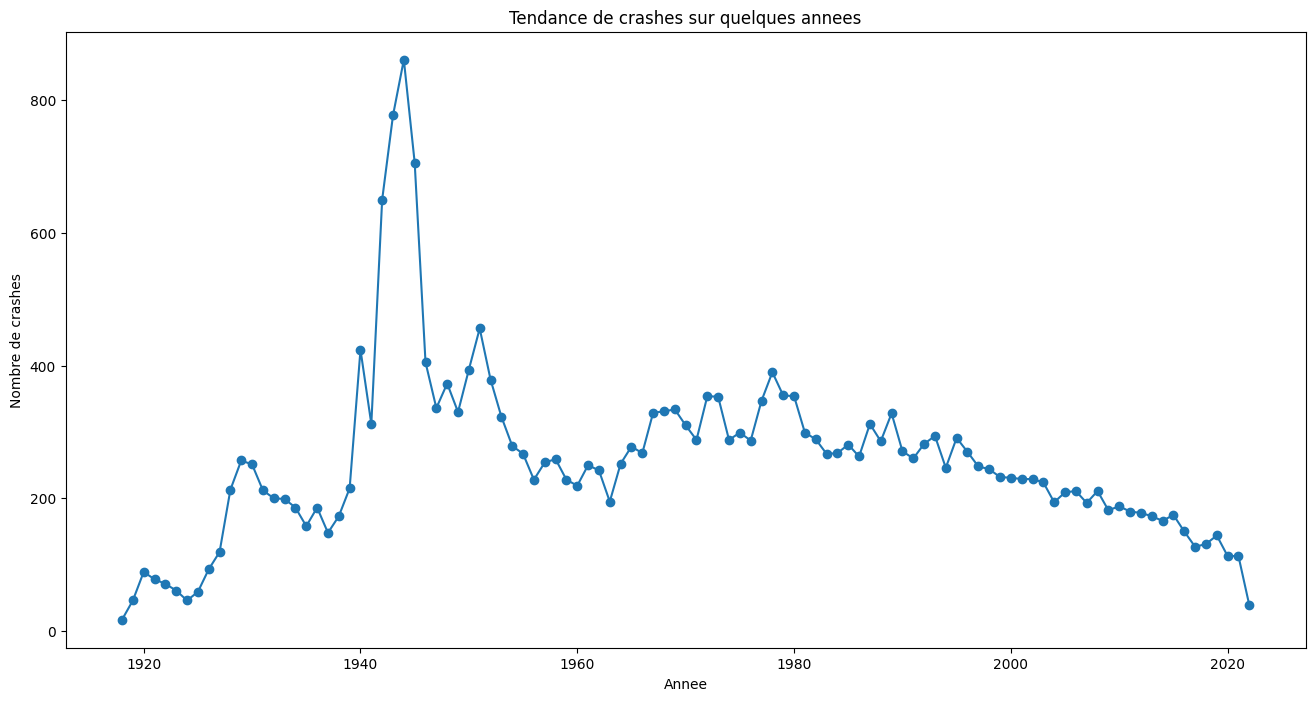

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
crashes_par_annee=df.groupby('Year').size()
print(crashes_par_annee)
crashes_par_annee.plot(kind='line',marker='o')
plt.title("Tendance de crashes sur quelques annees")
plt.xlabel('Annee')
plt.ylabel('Nombre de crashes')
plt.show()

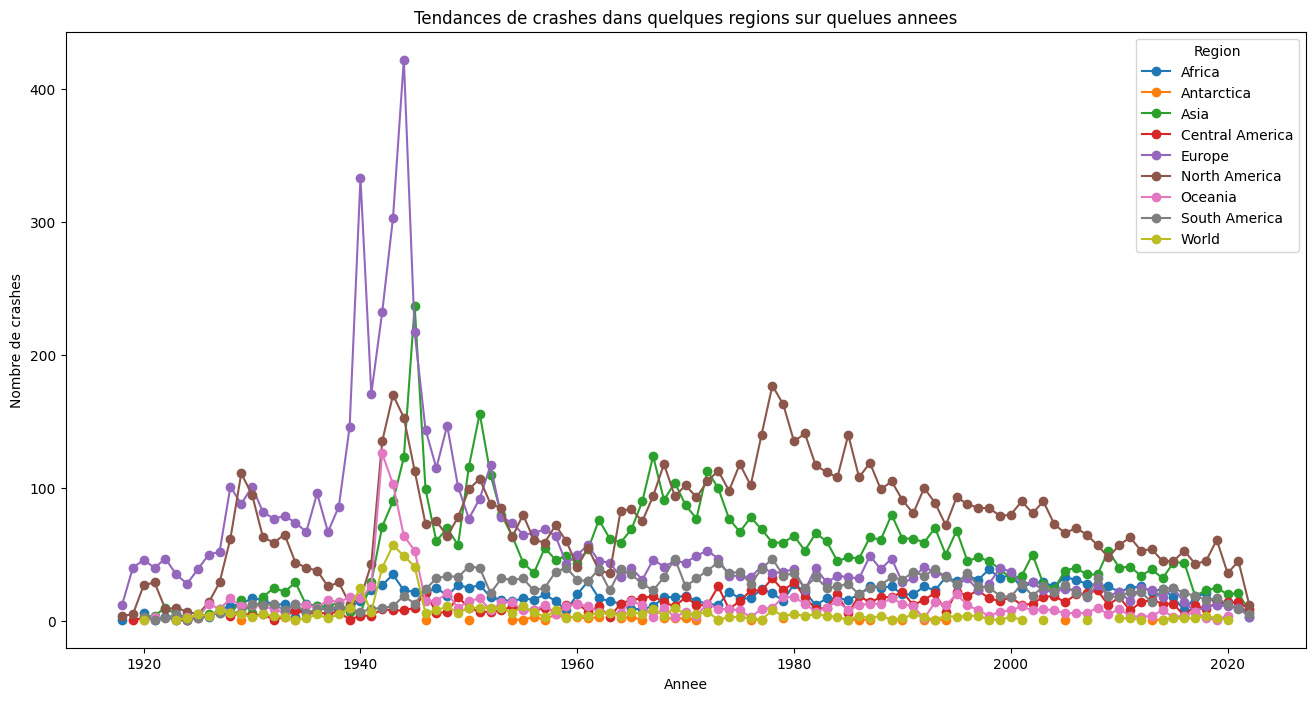

In [97]:
crashes_par_region=df.groupby(['Year','Region']).size().unstack()
crashes_par_region.plot(kind='line',marker='o',figsize=(16,8))
plt.title('Tendances de crashes dans quelques regions sur quelues annees')
plt.xlabel('Annee')
plt.ylabel('Nombre de crashes')
plt.legend(title='Region')
plt.show()


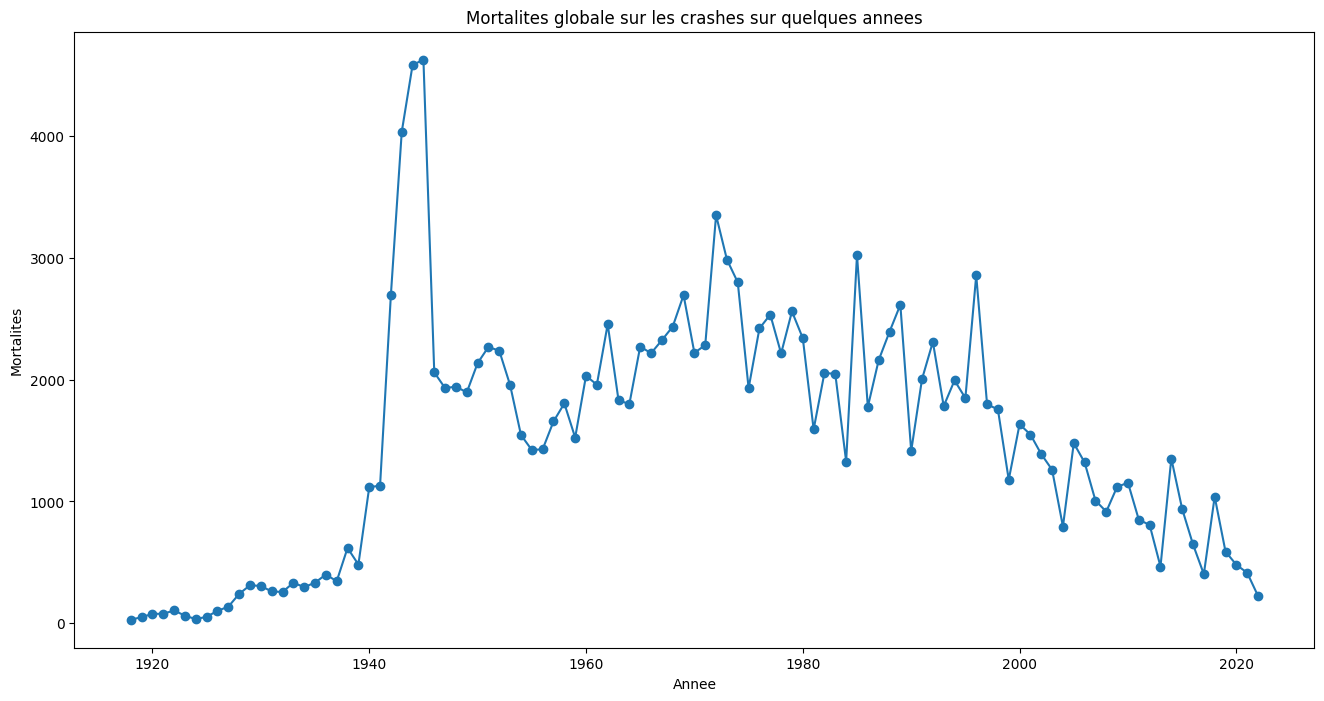

In [98]:
mortalites_par_annee=df.groupby('Year')['Total fatalities'].sum()
plt.figure(figsize=(16,8))
mortalites_par_annee.plot(kind='line',marker='o')
plt.title('Mortalites globale sur les crashes sur quelques annees')
plt.xlabel('Annee')
plt.ylabel('Mortalites')
plt.show()

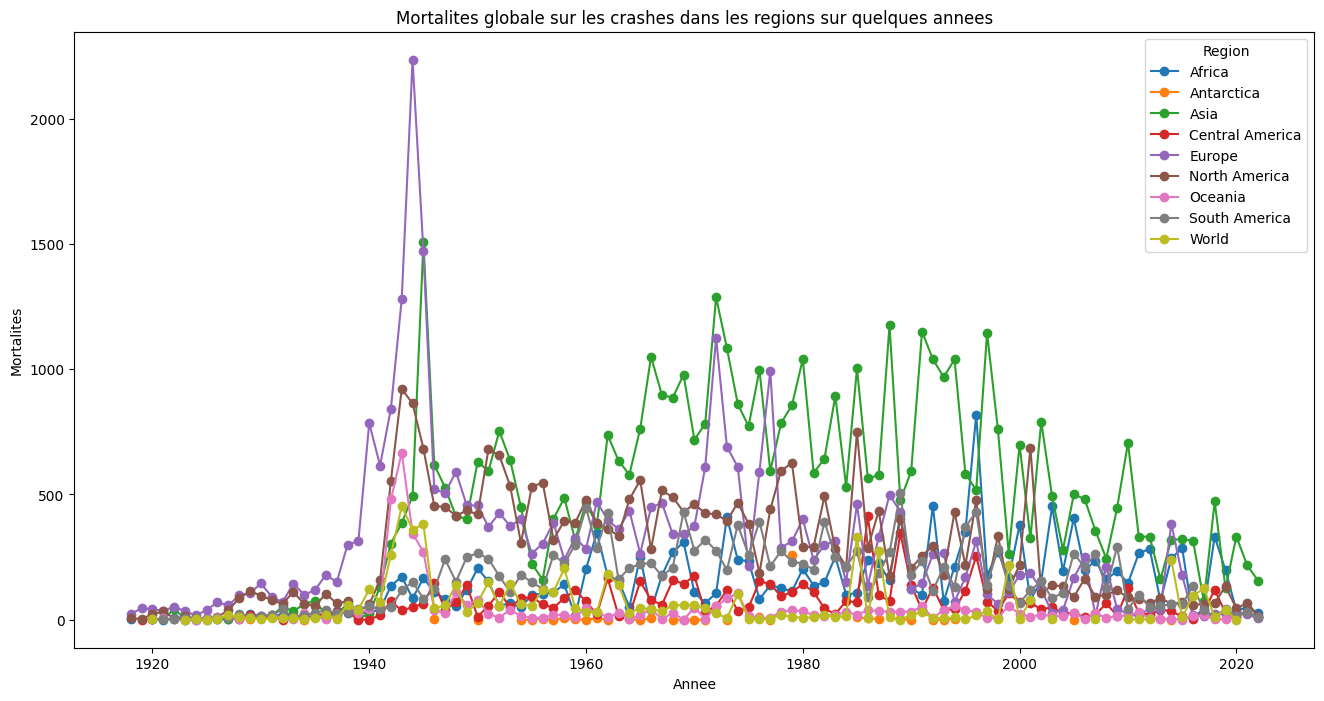

In [99]:
mortalites_par_region=df.groupby(['Year','Region'])['Total fatalities'].sum().unstack()
mortalites_par_region.plot(kind='line',marker='o',figsize=(16,8))
plt.title('Mortalites globale sur les crashes dans les regions sur quelques annees')
plt.xlabel('Annee')
plt.ylabel('Mortalites')
plt.legend(title='Region')
plt.show()

In [100]:
survivants_unique=df['Survivors'].unique()
print(survivants_unique)

['No' 'Yes']


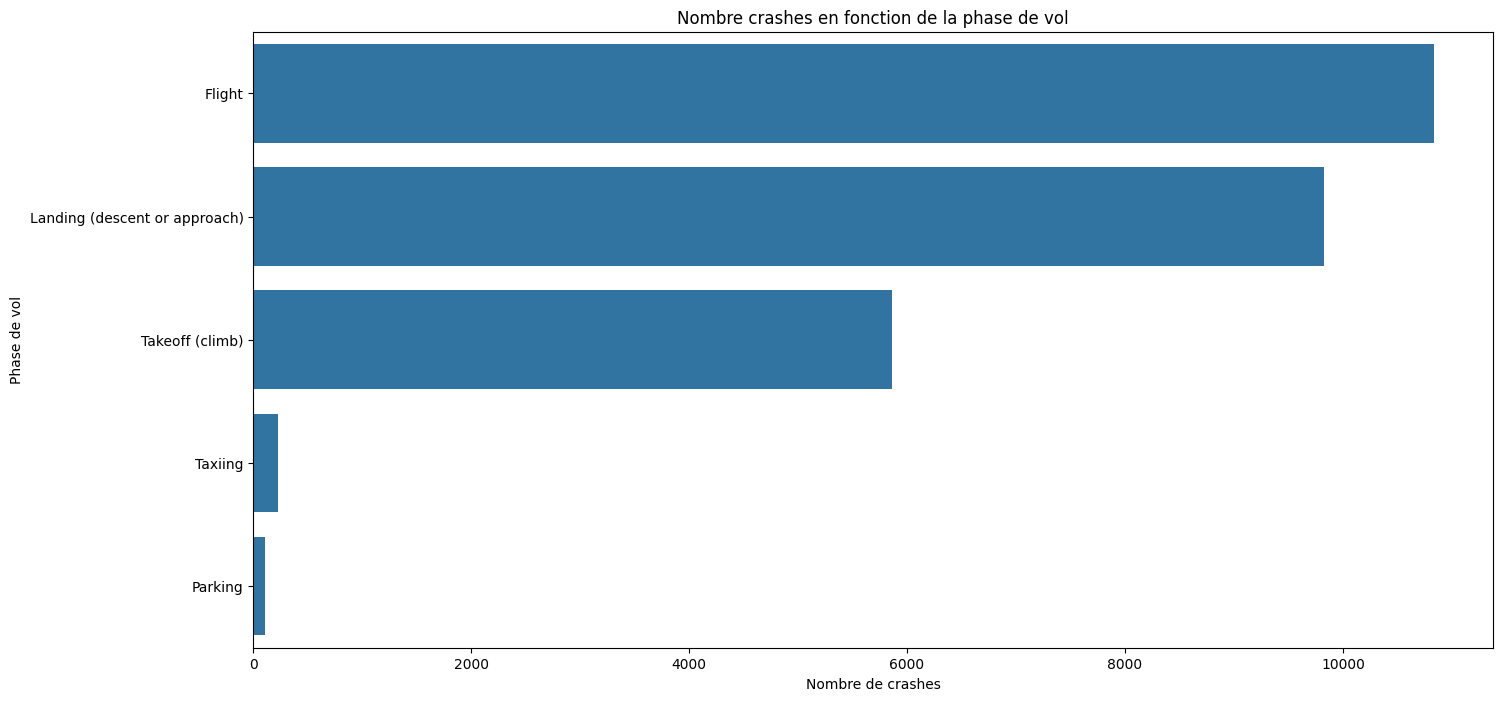

In [101]:
plt.figure(figsize=(16,8))
sns.countplot(y='Flight phase',data=df,order=df['Flight phase'].value_counts().index)
plt.title('Nombre crashes en fonction de la phase de vol')
plt.xlabel('Nombre de crashes')
plt.ylabel('Phase de vol')
plt.show()

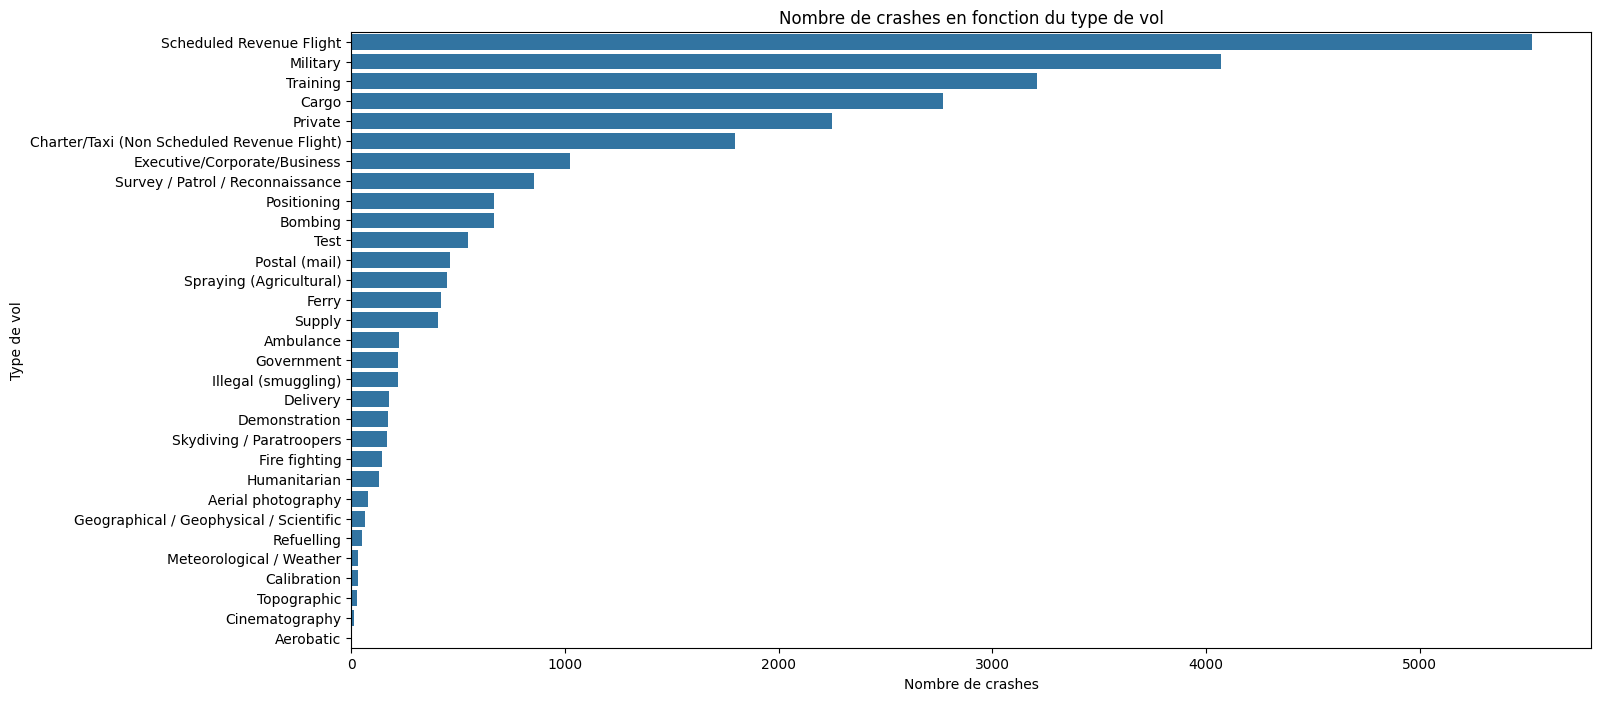

In [102]:
plt.figure(figsize=(16,8))
sns.countplot(y='Flight type',data=df,order=df['Flight type'].value_counts().index)
plt.title("Nombre de crashes en fonction du type de vol")
plt.xlabel('Nombre de crashes')
plt.ylabel('Type de vol')
plt.show()

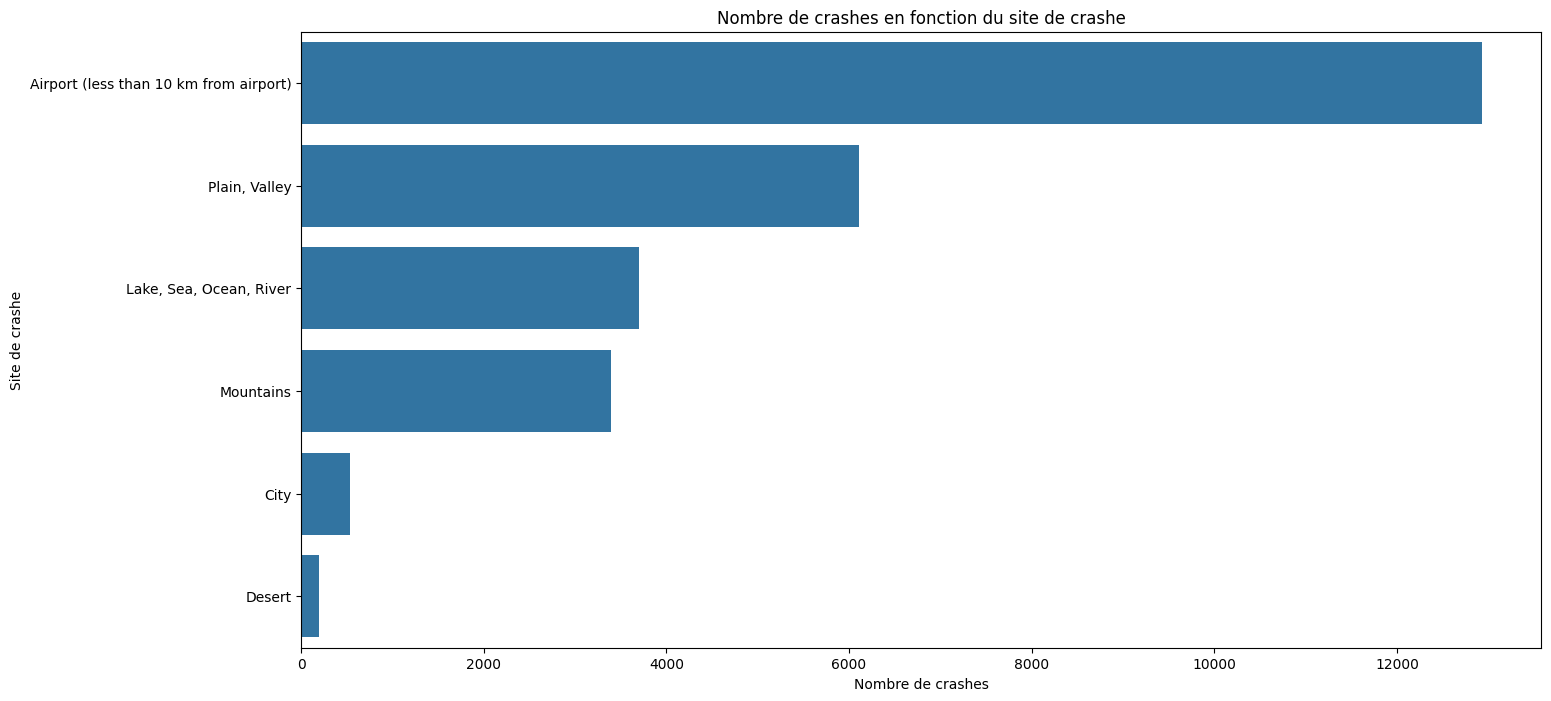

In [103]:
plt.figure(figsize=(16,8))
sns.countplot(y='Crash site',data=df,order=df['Crash site'].value_counts().index)
plt.title('Nombre de crashes en fonction du site de crashe')
plt.xlabel('Nombre de crashes')
plt.ylabel('Site de crashe')
plt.show()

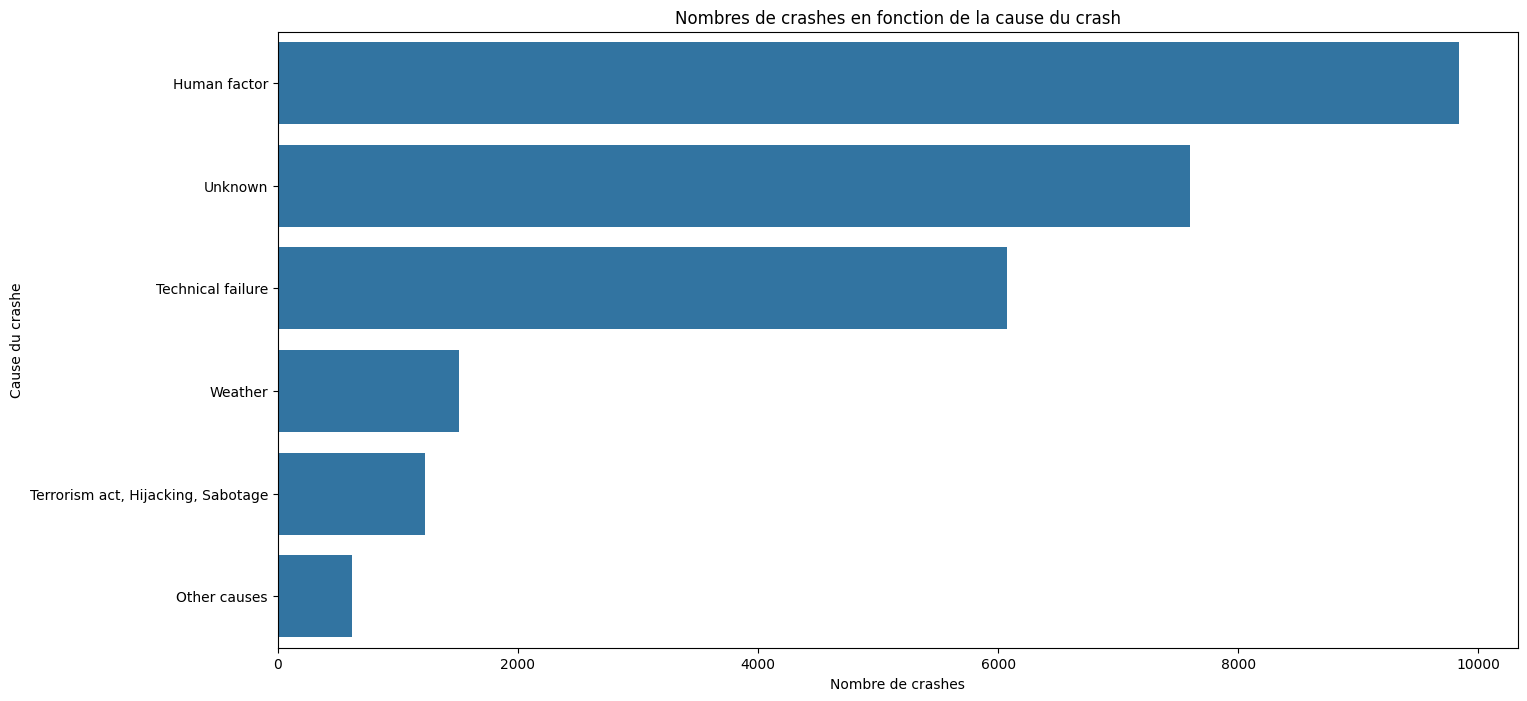

In [104]:
plt.figure(figsize=(16,8))
sns.countplot(y='Crash cause', data=df, order=df['Crash cause'].value_counts().index)
plt.title('Nombres de crashes en fonction de la cause du crash')
plt.xlabel('Nombre de crashes')
plt.ylabel('Cause du crashe')
plt.show()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26862 entries, 0 to 28535
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              26862 non-null  datetime64[ns]
 1   Flight phase      26862 non-null  object        
 2   Flight type       26862 non-null  object        
 3   Survivors         26862 non-null  object        
 4   Crash site        26862 non-null  object        
 5   Crash location    26862 non-null  object        
 6   Country           26862 non-null  object        
 7   Region            26862 non-null  object        
 8   Crew on board     26862 non-null  float64       
 9   Crew fatalities   26862 non-null  float64       
 10  Pax on board      26862 non-null  float64       
 11  PAX fatalities    26862 non-null  float64       
 12  Other fatalities  26862 non-null  float64       
 13  Total fatalities  26862 non-null  int64         
 14  Crash cause       26862 non

### Prétraitement et préparation des données pour le clustering

In [106]:
from sklearn.preprocessing import OneHotEncoder
features=df.drop(['Survivors','Date'], axis=1)
target=df['Survivors']

In [107]:
features_numerique=features.select_dtypes(include=['float64']).columns
features_categorielle=features.select_dtypes(include=['object']).columns

trans_categorielle=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
trans_numerique=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

preprocesseur=ColumnTransformer(transformers=[('num',trans_numerique,features_numerique),('cat',trans_categorielle,features_categorielle)])

#Application des transformations
X=preprocesseur.fit_transform(df)


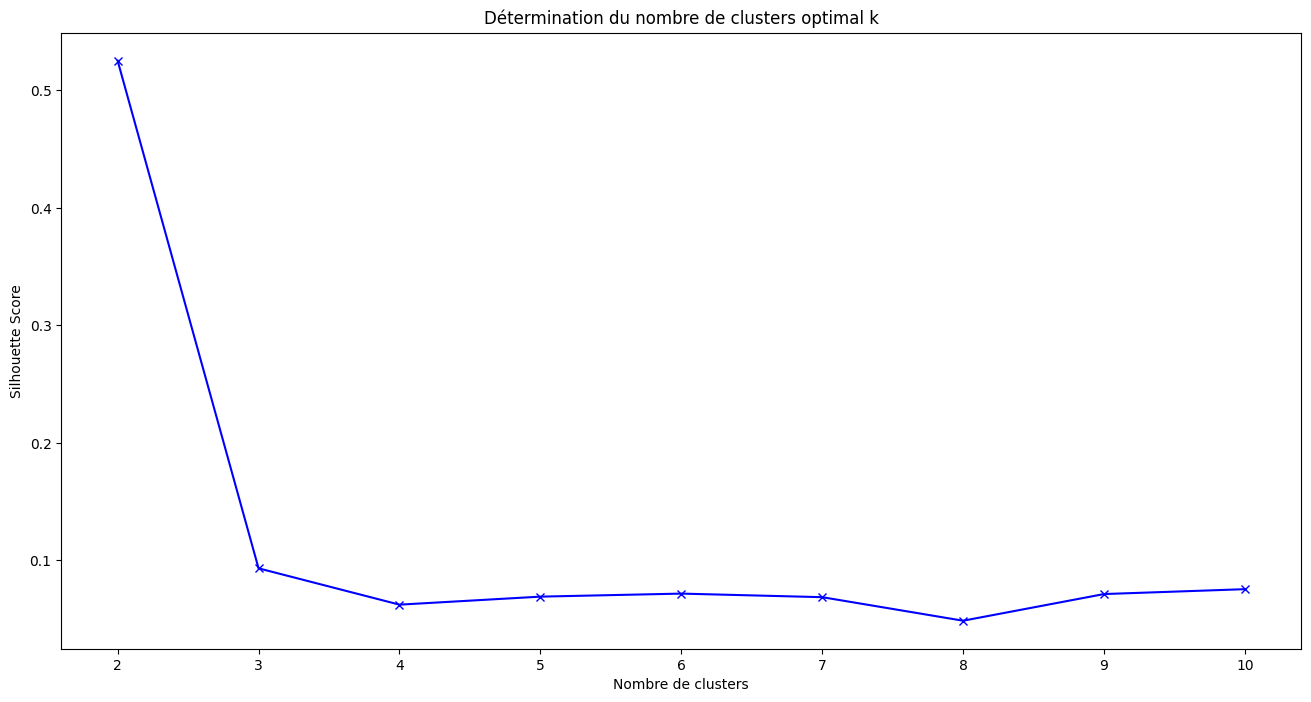

In [108]:
#Determination du meilleur nombre de clusters avec la methode de la silhouette
silhouette_scores=[]
for k in range (2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X,kmeans.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2,11),silhouette_scores,'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.title('Détermination du nombre de clusters optimal k')
plt.show()

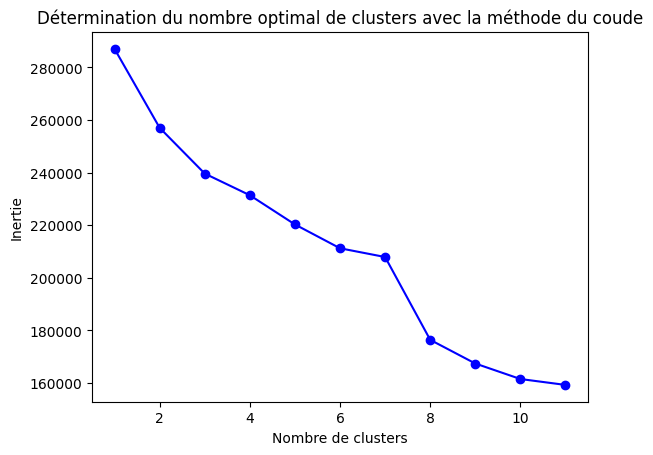

In [109]:
#Determination du meilleur nombre de clusters avec la méthode du coude
inertia=[]
for k in range(1,12):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,12),inertia,'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Détermination du nombre optimal de clusters avec la méthode du coude')
plt.show()

In [110]:
#Encodage onehot des variables catégorielle
df=pd.get_dummies(df,columns=['Flight phase','Flight type','Crash site','Crash location','Country','Region','Crash cause'])

#Conversions de la colonne 'Survivors' en colonne de 1 ou 0
df['Survivors']=df['Survivors'].map({'Yes':1,'No':0})

#Sélection des caractéristiques pertinentes pour la sévérité
features_severe=['Total fatalities','Crew fatalities','PAX fatalities','Other fatalities','Survivors']

#Revérification
print(df.dtypes)

Date                                              datetime64[ns]
Survivors                                                  int64
Crew on board                                            float64
Crew fatalities                                          float64
Pax on board                                             float64
                                                       ...      
Crash cause_Other causes                                    bool
Crash cause_Technical failure                               bool
Crash cause_Terrorism act, Hijacking, Sabotage              bool
Crash cause_Unknown                                         bool
Crash cause_Weather                                         bool
Length: 14006, dtype: object


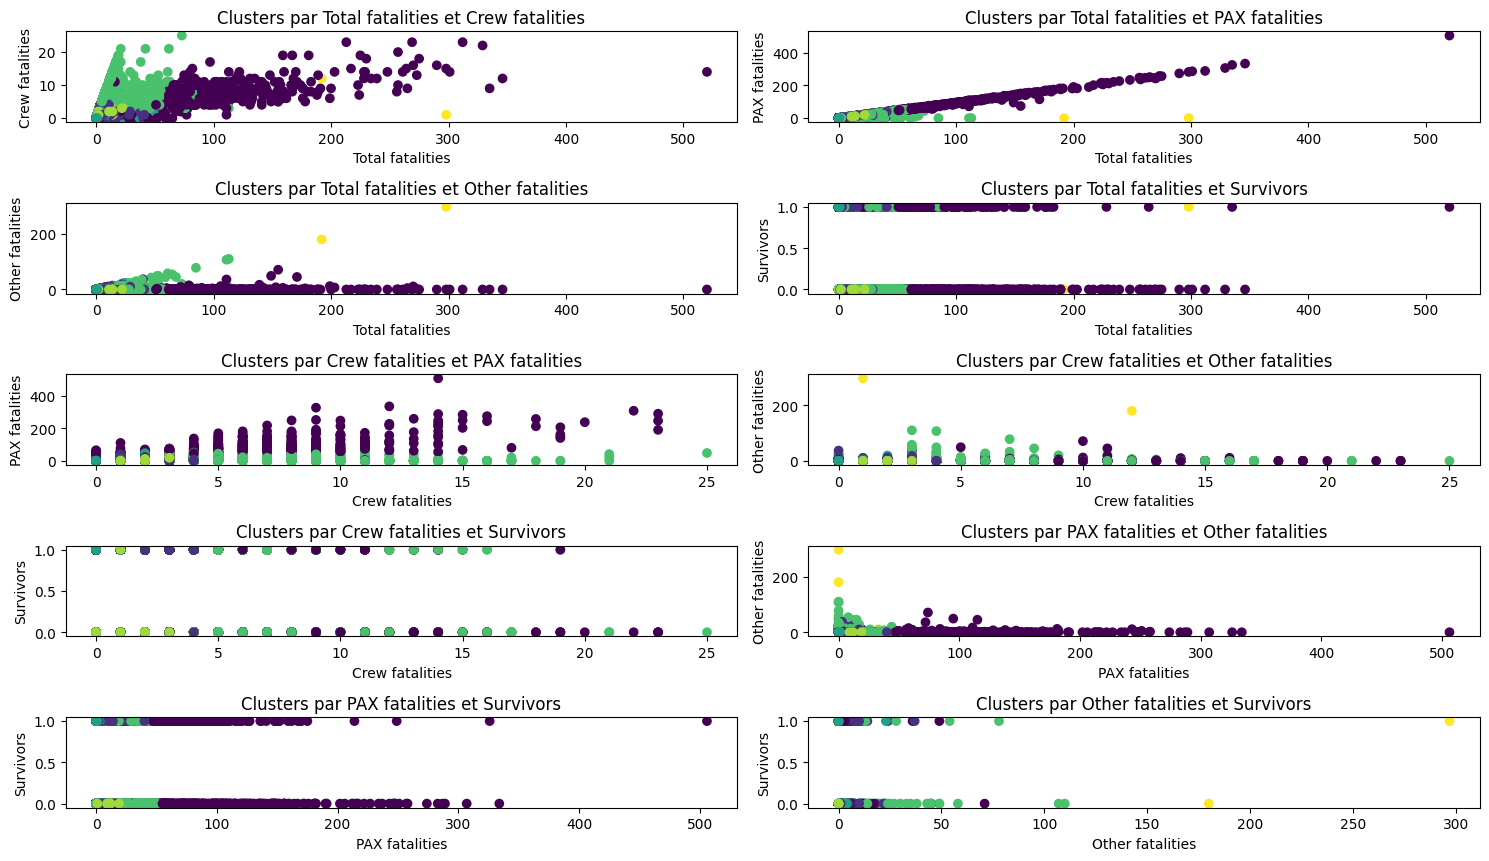


Statistiques descriptives pour le cluster 0 :
       Total fatalities  Crew fatalities  PAX fatalities  Other fatalities  \
count        597.000000       597.000000      597.000000        597.000000   
mean          83.180905         5.673367       76.849246          0.658291   
std           66.784619         4.420306       62.964921          4.500986   
min            0.000000         0.000000        0.000000          0.000000   
25%           46.000000         2.000000       44.000000          0.000000   
50%           78.000000         6.000000       71.000000          0.000000   
75%          112.000000         8.000000      104.000000          0.000000   
max          520.000000        23.000000      506.000000         71.000000   

        Survivors  
count  597.000000  
mean     0.500838  
std      0.500419  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

Statistiques descriptives pour le cluster 1 :
       Total fatalities

In [117]:
#J'ai préféré utiliser les résultats du silhoette score car plus lisible
k_opt=2

kmeans=KMeans(n_clusters=ko,random_state=42)
clusters=kmeans.fit_predict(X)

#Ajout de clusters au dataframe initial
df['Cluster']=clusters

#Visualisation des clusters avec toutes les combinaisons de variables numeriques
var_combinaison=list(combinations(features_severe,2))

plt.figure(figsize=(15,10))

for i,(feature1,feature2) in enumerate (var_combinaison):
    plt.subplot(len(var_combinaison) // 2+1,2,i+1)
    plt.scatter(df[feature1],df[feature2],c=df['Cluster'],cmap='viridis')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Clusters par {feature1} et {feature2}')
plt.tight_layout()
plt.show()
# Conclusion

# Affichage des statistiques descriptives pour chaque cluster
for cluster in range(k_opt):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nStatistiques descriptives pour le cluster {cluster} :")
    print(cluster_data[features_severe].describe())

# Analyse des clusters
print("\nAnalyse des clusters :")
for cluster in range(k_opt):
    cluster_size = df[df['Cluster'] == cluster].shape[0]
    avg_total_fatalities = df[df['Cluster'] == cluster]['Total fatalities'].mean()
    avg_crew_fatalities = df[df['Cluster'] == cluster]['Crew fatalities'].mean()
    avg_pax_fatalities = df[df['Cluster'] == cluster]['PAX fatalities'].mean()
    avg_other_fatalities = df[df['Cluster'] == cluster]['Other fatalities'].mean()
    avg_survivors = df[df['Cluster'] == cluster]['Survivors'].mean()
    
    print(f"\nCluster {cluster}:")
    print(f"Taille du cluster: {cluster_size}")
    print(f"Fatalités totales moyennes: {avg_total_fatalities}")
    print(f"Fatalités de l'équipage moyennes: {avg_crew_fatalities}")
    print(f"Fatalités des passagers moyennes: {avg_pax_fatalities}")
    print(f"Autres fatalités moyennes: {avg_other_fatalities}")
    print(f"Survivants moyens: {avg_survivors}")

##### Le but était de regrouper les crashs d'avions en fonction de la sévérité ou du type d'incident